# Quickstart example

In the following example, we use the "test" MRIOT of the pymrio module,
which doesn't require to load additional data and has a low number of sectors and
regions, allowing fast computation.

## Instantiating a model from a MRIOT system

First import the required elements. We use the ARIOPsiModel version here (which you probably should).

In [23]:
# import pymrio for the test MRIOT
import pymrio
# import the different classes
from boario.extended_models import ARIOPsiModel  # The core of the model

Some attributes of the test MRIOT are not computed. Calling calc_all() insure all required tables are present in the IOSystem object.

In [24]:
mriot = pymrio.load_test().calc_all()

If you see multiple: ``FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.``
Don't panic, this comes from `pymrio` but it is not an error, just a synthax warning.

In case you find it annoying, you can use the following beforehand:

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Instantiating the model is very straightforward:

In [26]:
model = ARIOPsiModel(mriot)

This sets the model with all the default parameters. We highly recommand you to study the different parameters and their options for actual use. See [Changing the model parameters](../tutorials/model-params.rst).

Similarly, instantiating a simulation is also quite easy:

In [27]:
from boario.simulation import Simulation  # Simulation wraps the model

sim = Simulation(model,n_temporal_units_to_sim=730)

Once the model and simulation have been instantiated, you can now define an event:

In [28]:
from boario.event import EventKapitalRebuild  # A class defining a shock on capital

# Instantiate an event.
ev = EventKapitalRebuild.from_scalar_regions_sectors(
  impact=500000,
  regions=["reg1"],
  sectors=["manufactoring", "mining"],
  impact_sectoral_distrib = "gdp",
  rebuilding_sectors={"construction": 0.55,"manufactoring": 0.45},
  rebuilding_factor=1.0,
  rebuild_tau=90,
)

Here we define an event happening in region ``reg1`` impacting the productive capital of the ``manufactoring``[^note-1] and ``mining`` sectors. The impact is distributed among the two sectors proportional to their participation to ``reg1``'s GDP. 

The entire impact is translated into a reconstruction demand, handled by the ``construction`` (55%) and ``manufactoring`` (45%) sectors. This reconstruction has a characteristic time of 90 unit steps.

See [Defining events](../tutorials/boario-events.rst), for more in depth explanation on how to define events.

[^note-1]: There is a typo in the sector's name in pymrio, not in our code.

The event can then be added to the simulation:

In [29]:
# Add the event to the simulation
sim.add_event(ev)

And the loop can be run:

In [30]:
# Launch the simulation
sim.loop()

Processed: Step: 730 ~ 100% Time:  0:00:01                 
Processed: Step: 730 ~ 100% Time:  0:00:01                 

Once the simulation ran, you can access and plot the timeseries of the variables (see [Monitoring the variables](../tutorials/simulation-context.rst#monitoring-the-model-variables) for a list of accessible variables).

Here is an example showing the relative change in production in the different sectors in ``"reg1"``.

<Axes: xlabel='step'>

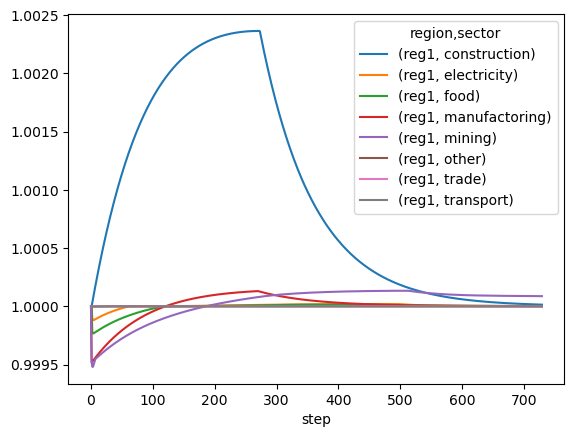

In [32]:
# You should be able to generate a dataframe of
# the production with the following line
df = sim.production_realised
# This allows to normalize production at its initial level
df = df / df.loc[0]

df.loc[:, ("reg1", slice(None))].plot()